## **1. Data Import and Exploration**

### **A. Read the .h5 file and assign to a variable.**

In [59]:
import h5py

In [61]:
# Assinging the data from google drive to Pandas data frame
h5_data = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

### **B. Print all the keys from the .h5 file.**

In [62]:
h5_data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

### **C. Split the data into X_train, X_test, Y_train, Y_test**

In [63]:
# Loading Test, Training and validation data to variables
X_train = h5_data['X_train'][:]
X_test = h5_data['X_test'][:]
X_val = h5_data['X_val'][:]
y_train = h5_data['y_train'][:]
y_test = h5_data['y_test'][:]
y_val = h5_data['y_val'][:]

In [64]:
# Closing the large h5 file
h5_data.close()

## **2. Data Visualisation and preprocessing**

### **A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.**

In [65]:
# Displaying the actual shapes
print('X Train shape - ', X_train.shape)
print('X Test shape - ', X_test.shape)
print('X val shape - ', X_val.shape)
print('y Train shape - ', y_train.shape)
print('y Test shape - ', y_test.shape)
print('y val shape - ', y_val.shape)

X Train shape -  (42000, 32, 32)
X Test shape -  (18000, 32, 32)
X val shape -  (60000, 32, 32)
y Train shape -  (42000,)
y Test shape -  (18000,)
y val shape -  (60000,)


### **B. Visualise first 10 images in train data and print its corresponding labels.**

Label for the below image is 2


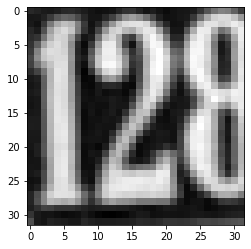

In [66]:
# Displaying first data from dataset along with label
plt.imshow(X_train[0],cmap='gray')
print(f'Label for the below image is {y_train[0]}')

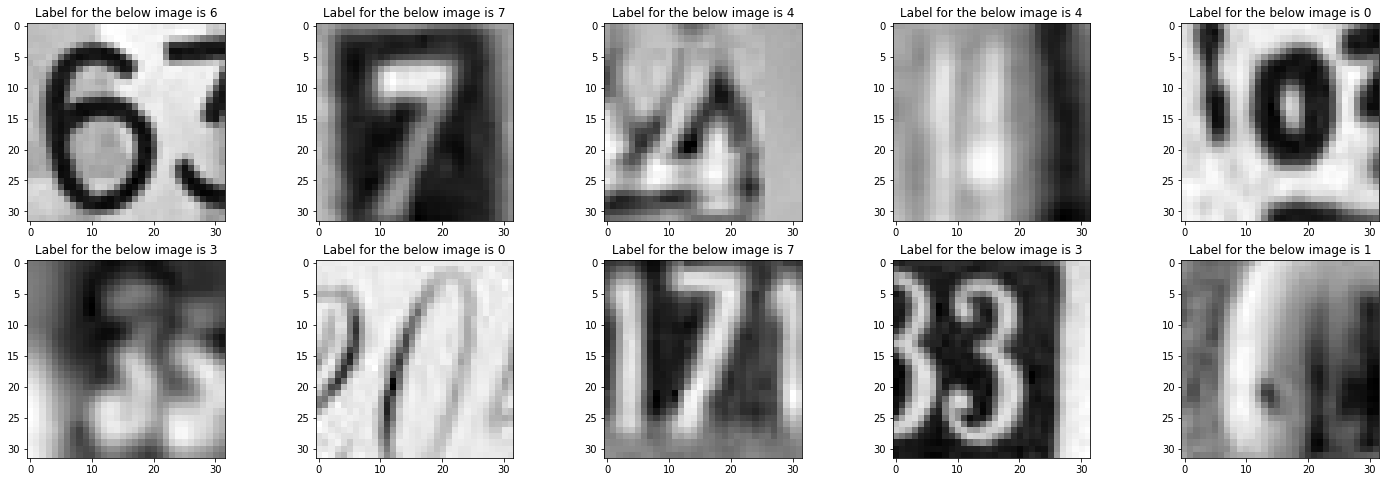

In [67]:
# Visualizing the dataset
fig = plt.figure(figsize = (25, 8))
columns = 5
rows = 2
for i in range(1, columns * rows + 1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')
    plt.title(f'Label for the below image is {y_train[i]}')
plt.show()

### **C. Reshape all the images with appropriate shape update the data in same variable**

In [68]:
# Resizing/Reshaping dataset - 3d data to 2d data conversion

X_train = X_train.reshape(X_train.shape[0], 32*32, 1)
X_test = X_test.reshape(X_test.shape[0], 32*32, 1)
X_val = X_val.reshape(X_val.shape[0], 32*32, 1)

### **D. Normalise the images i.e. Normalise the pixel values.**

In [69]:
# Grayscale Image has values ranging from 0-255. Normalizing it to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [70]:
print('Reshaped X Train - ', X_train.shape)
print('Reshaped X Test - ', X_test.shape)
print('Reshaped X val - ', X_val.shape)
print('Reshaped y Train - ', y_train.shape)
print('Reshaped y Test - ', y_test.shape)
print('Reshaped y Val - ', y_val.shape)


Reshaped X Train -  (42000, 1024, 1)
Reshaped X Test -  (18000, 1024, 1)
Reshaped X val -  (60000, 1024, 1)
Reshaped y Train -  (42000,)
Reshaped y Test -  (18000,)
Reshaped y Val -  (60000,)


### **E. Transform Labels into format acceptable by Neural Network**

In [74]:
# One hot encoding for the target variable
from tensorflow.keras.utils import to_categorical

y_train_label = to_categorical(y_train)
y_test_label = to_categorical(y_test)
y_val_label = to_categorical(y_val)


### **F. Print total Number of classes in the Dataset.**

In [75]:
# way-1 - total number of classes in the dataset will be nothing but the column size of y_train/y_test/y_val
num_types = y_test_label.shape[1]
print("total number of classes in dataset:",num_types)

total number of classes in dataset: 10


In [76]:
# way-2  - get the unique values count from y_train, y_test, y_val
print("total number of classes in dataset:", len(set([*y_train, *y_test, *y_val])))


total number of classes in dataset: 10


## **3. Model Training & Evaluation using Neural Network**

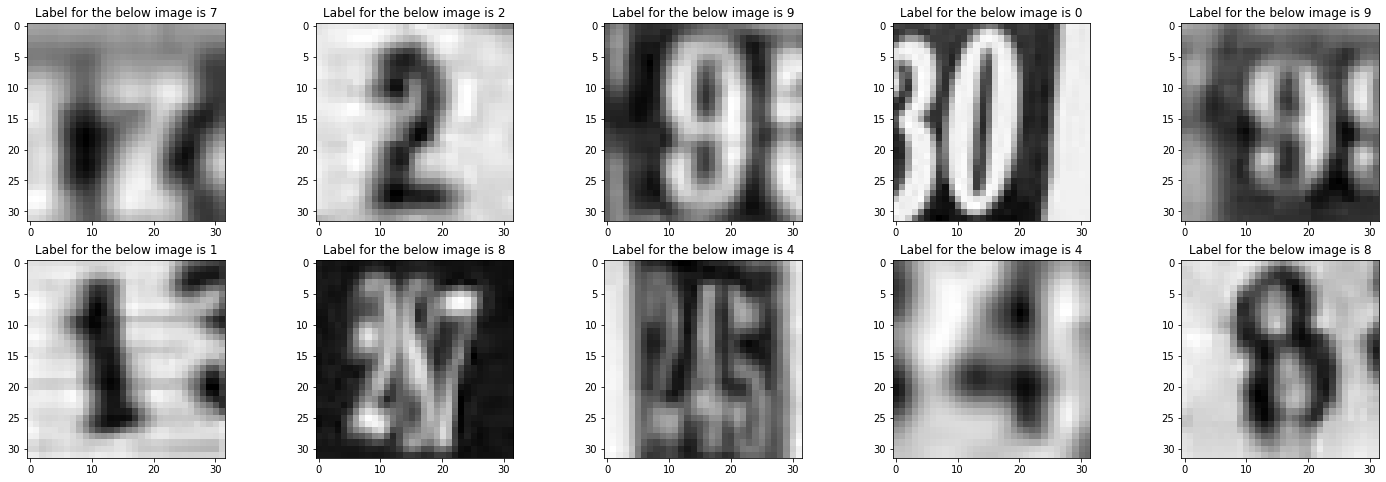

In [77]:
# Visualizing the dataset to check normalizing and reshaping is accurate
fig = plt.figure(figsize = (25, 8))
columns = 5
rows = 2
for i in range(1, columns * rows + 1):
    img = X_test[i].reshape(32,32)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')
    plt.title(f'Label for the below image is {np.argmax(y_test_label[0:11][i])}')
plt.show()

### **A. Design a Neural Network to train a classifier.**

In [78]:
def design_model():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

### **B. Train the classifier using previously designed Architecture**

In [79]:
model = design_model()

In [80]:
# Model Compilation
sgd = optimizers.Adam(learning_rate=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 

In [81]:
# Model Fitting

fit_model = model.fit(X_train, y_train_label, validation_data=(X_val, y_val_label), epochs=100, batch_size=300, verbose=2)

Epoch 1/100
140/140 - 5s - loss: 2.2770 - accuracy: 0.1355 - val_loss: 2.1395 - val_accuracy: 0.2353 - 5s/epoch - 34ms/step
Epoch 2/100
140/140 - 4s - loss: 1.9279 - accuracy: 0.3125 - val_loss: 1.7640 - val_accuracy: 0.3765 - 4s/epoch - 29ms/step
Epoch 3/100
140/140 - 4s - loss: 1.6348 - accuracy: 0.4384 - val_loss: 1.5295 - val_accuracy: 0.4929 - 4s/epoch - 27ms/step
Epoch 4/100
140/140 - 2s - loss: 1.4428 - accuracy: 0.5200 - val_loss: 1.3401 - val_accuracy: 0.5598 - 2s/epoch - 17ms/step
Epoch 5/100
140/140 - 2s - loss: 1.3237 - accuracy: 0.5664 - val_loss: 1.2713 - val_accuracy: 0.5867 - 2s/epoch - 18ms/step
Epoch 6/100
140/140 - 3s - loss: 1.2459 - accuracy: 0.5985 - val_loss: 1.2658 - val_accuracy: 0.5855 - 3s/epoch - 18ms/step
Epoch 7/100
140/140 - 2s - loss: 1.2180 - accuracy: 0.6088 - val_loss: 1.1452 - val_accuracy: 0.6402 - 2s/epoch - 17ms/step
Epoch 8/100
140/140 - 2s - loss: 1.1315 - accuracy: 0.6423 - val_loss: 1.1041 - val_accuracy: 0.6504 - 2s/epoch - 17ms/step
Epoch 9/

### **C. Evaluate performance of the model with appropriate metrics.**

In [82]:
# Model Evaluation
scores = model.evaluate(X_test, y_test_label, verbose=2)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

563/563 - 2s - loss: 0.6965 - accuracy: 0.8033 - 2s/epoch - 3ms/step
Loss: 0.696540892124176
Accuracy: 0.8032777905464172


In [83]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense_105 (Dense)           (None, 256)               262400    
                                                                 
 dense_106 (Dense)           (None, 64)                16448     
                                                                 
 dense_107 (Dense)           (None, 64)                4160      
                                                                 
 dense_108 (Dense)           (None, 32)                2080      
                                                                 
 dense_109 (Dense)           (None, 10)                330       
                                                                 
Total params: 285,418
Trainable params: 285,418
Non-t

In [84]:
# Prediction for X_test
y_test_pred = model.predict(X_test)

# Find out the predictions classes with maximum probability
y_test_pred = np.argmax(y_test_pred, axis=1)

In [85]:
y_test_pred

array([0, 2, 2, ..., 7, 9, 2])

In [86]:
confusion_matrix(y_test, y_test_pred )

array([[1501,   52,    6,   38,   57,   19,   46,   37,   14,   44],
       [  35, 1488,   22,   70,   77,   18,   17,   66,   19,   16],
       [  20,   28, 1455,   77,   40,   27,    6,  107,   18,   25],
       [  23,   36,   38, 1357,   25,  125,   14,   50,   29,   22],
       [  33,   40,   27,   22, 1579,   26,   30,   18,   14,   23],
       [  23,   19,    8,  120,   19, 1418,   72,   26,   32,   31],
       [  62,   33,   15,   38,   58,   91, 1443,   17,   60,   15],
       [  14,   60,   43,   37,   18,   13,   12, 1585,   11,   15],
       [  45,   43,   19,  105,   48,   85,  116,   22, 1271,   58],
       [  68,   43,   27,   70,   48,   92,   24,   38,   32, 1362]])

In [87]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1814
           1       0.81      0.81      0.81      1828
           2       0.88      0.81      0.84      1803
           3       0.70      0.79      0.74      1719
           4       0.80      0.87      0.84      1812
           5       0.74      0.80      0.77      1768
           6       0.81      0.79      0.80      1832
           7       0.81      0.88      0.84      1808
           8       0.85      0.70      0.77      1812
           9       0.85      0.75      0.80      1804

    accuracy                           0.80     18000
   macro avg       0.81      0.80      0.80     18000
weighted avg       0.81      0.80      0.80     18000



### **D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.**

In [88]:
fit_model.history

{'accuracy': [0.13552381098270416,
  0.31247618794441223,
  0.4383809566497803,
  0.5199523568153381,
  0.5664047598838806,
  0.5984761714935303,
  0.6087619066238403,
  0.6422619223594666,
  0.6607142686843872,
  0.6675952672958374,
  0.6813809275627136,
  0.6976428627967834,
  0.7019523978233337,
  0.7068809270858765,
  0.7110952138900757,
  0.7238571643829346,
  0.7286190390586853,
  0.73416668176651,
  0.7412381172180176,
  0.743571400642395,
  0.7494285702705383,
  0.7525952458381653,
  0.7562618851661682,
  0.7615237832069397,
  0.7642857432365417,
  0.7680000066757202,
  0.7680237889289856,
  0.77269047498703,
  0.7752380967140198,
  0.7811904549598694,
  0.7782857418060303,
  0.7806428670883179,
  0.7870237827301025,
  0.786642849445343,
  0.7913809418678284,
  0.7919762134552002,
  0.7972618937492371,
  0.7994285821914673,
  0.7994523644447327,
  0.8008809685707092,
  0.803690493106842,
  0.8048095107078552,
  0.8056666851043701,
  0.8086904883384705,
  0.8135952353477478,
  0

In [89]:
accuracy      = fit_model.history['accuracy']
val_accuracy  = fit_model.history['val_accuracy']
loss     = fit_model.history['loss']
val_loss = fit_model.history['val_loss']

epochs   = range(len(accuracy))

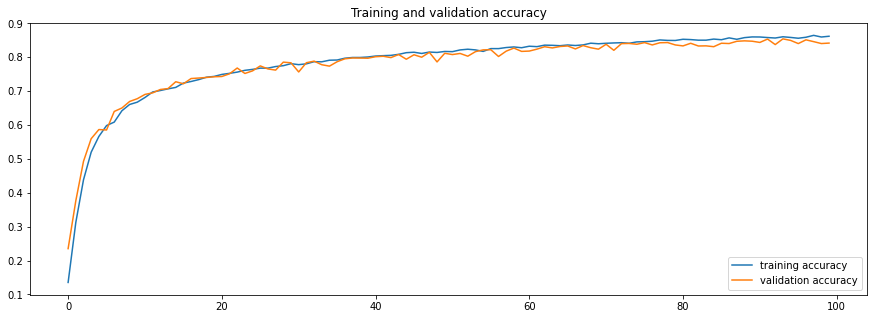

In [90]:
# Training and validation accuracy
plt.figure(figsize=(15, 5))
plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')


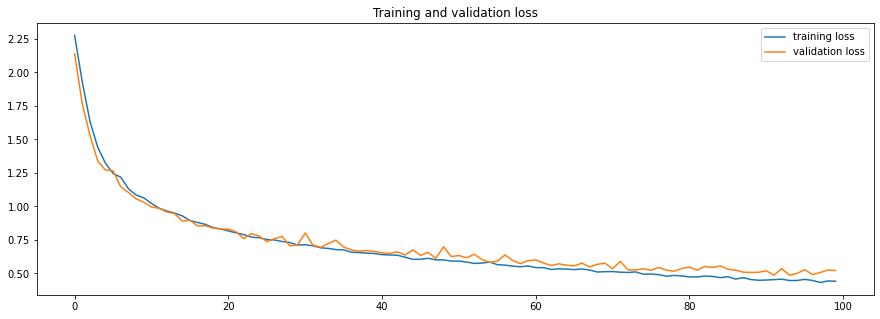

In [91]:
# Training and validation loss
plt.figure(figsize=(15, 5))
plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.title ('Training and validation loss')
plt.legend(loc = 'upper right')

**Observations:**

* Model is built with 10 types of image numbers combo ranging from 0-9
* It is noticed that both train & validation datasets have pretty much same accuracy & loss ( although, there is slight more loss for validation set).

* The model fetting seems to happen properly. Accuracy in detecting the numbers from image for different datasets are:

  * Train accuracy - 86 %
  * Validation accuracy - 84 %
  * Test accuracy - 80 %